In [5]:
%pylab
%matplotlib inline
from skimage import io

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


# KNN

In [4]:
from sklearn.datasets import fetch_mldata
mnist= fetch_mldata('MNIST original', data_home='./')
print(mnist['data'].shape) #60000 training 10000 test 28x28=784




(70000, 784)


## Visualizedata

2


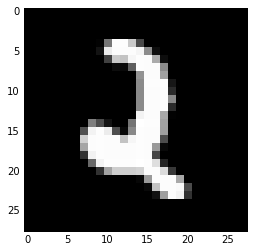

In [8]:
#reshape convierte el vector ej 784 28x28
index=63000
im=mnist['data'][1]
a=mnist['data'][index].reshape((28,28)) # accediendo a la posicion del 0 del dataset
io.imshow(a)
b=mnist['target'][index] #Primera etiqueta 
print(int32(b))

In [9]:
from skimage import data
from skimage.transform import rescale
rescale(a)

ValueError: cannot resize this array: it does not own its data

# Dataset

In [43]:
X_train=mnist['data'][0:60000]
Y_train=mnist['target'][0:60000]
print(X_train.shape[1])
print (Y_train.shape[0])
X_test=mnist['data'][60000:70000]
Y_test=mnist['target'][60000:70000]


784
60000


# KNN testing

In [31]:
Y_pred = np.zeros(10000) 
for n in range(10000):
    resta = X_train - X_test[n]
    cuadrado = np.power(resta,2)
    suma = np.sum(cuadrado, axis=1)
    Y_pred[n] = Y_train[suma.argmin()]
    #Y_pred[n] = Y_train[(np.unravel_index(suma.argmin(), suma.shape))]


# KNN




In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3, n_jobs = -1)
neigh.fit(X_train, Y_train)
Y_pred = neigh.predict(X_test)


# Clasificador lineal

In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)


In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred) )

             precision    recall  f1-score   support

        0.0       0.10      1.00      0.18       980
        1.0       0.00      0.00      0.00      1135
        2.0       0.00      0.00      0.00      1032
        3.0       0.00      0.00      0.00      1010
        4.0       0.00      0.00      0.00       982
        5.0       0.00      0.00      0.00       892
        6.0       0.00      0.00      0.00       958
        7.0       0.00      0.00      0.00      1028
        8.0       0.00      0.00      0.00       974
        9.0       0.00      0.00      0.00      1009

avg / total       0.01      0.10      0.02     10000

[[ 980    0    0    0    0    0    0    0    0    0]
 [1135    0    0    0    0    0    0    0    0    0]
 [1032    0    0    0    0    0    0    0    0    0]
 [1010    0    0    0    0    0    0    0    0    0]
 [ 982    0    0    0    0    0    0    0    0    0]
 [ 892    0    0    0    0    0    0    0    0    0]
 [ 958    0    0    0    0    0    0    0  

/home/cesar/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Test matrix

In [8]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
print(X)
y = np.array([1, 1, 2, 2])
print (y)
from sklearn.svm import SVC
clf = SVC()
clf.fit(X, y) 
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-2, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
print(clf.predict([[-0.8, 1]]))



[[-1 -1]
 [-2 -1]
 [ 1  1]
 [ 2  1]]
[1 1 2 2]
[2]
